## Optymalizacja kosztów podróży z wykorzystaniem algorytmu symulowanego wyżarzania.
## na przykładzie - Volkswagen Transporter t4






### Dominik Tomalczyk 
### Dawid Woźniak

### Niezbędne importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
import src.data_structures as ds
import src.utils as utils
from src.sa_algorithm import init_solution,simulated_annealing
from src.sa_algorithm import new_solution
from src.visualization import plot_random_stations
from src.visualization import plot_score, plot_solution

Parametry niezbędne do obliczeń zaczerpnięte ze specyfikacji samochodu:
- Pojemność baku - 80l
- średnie spalanie /100km - 7.3l

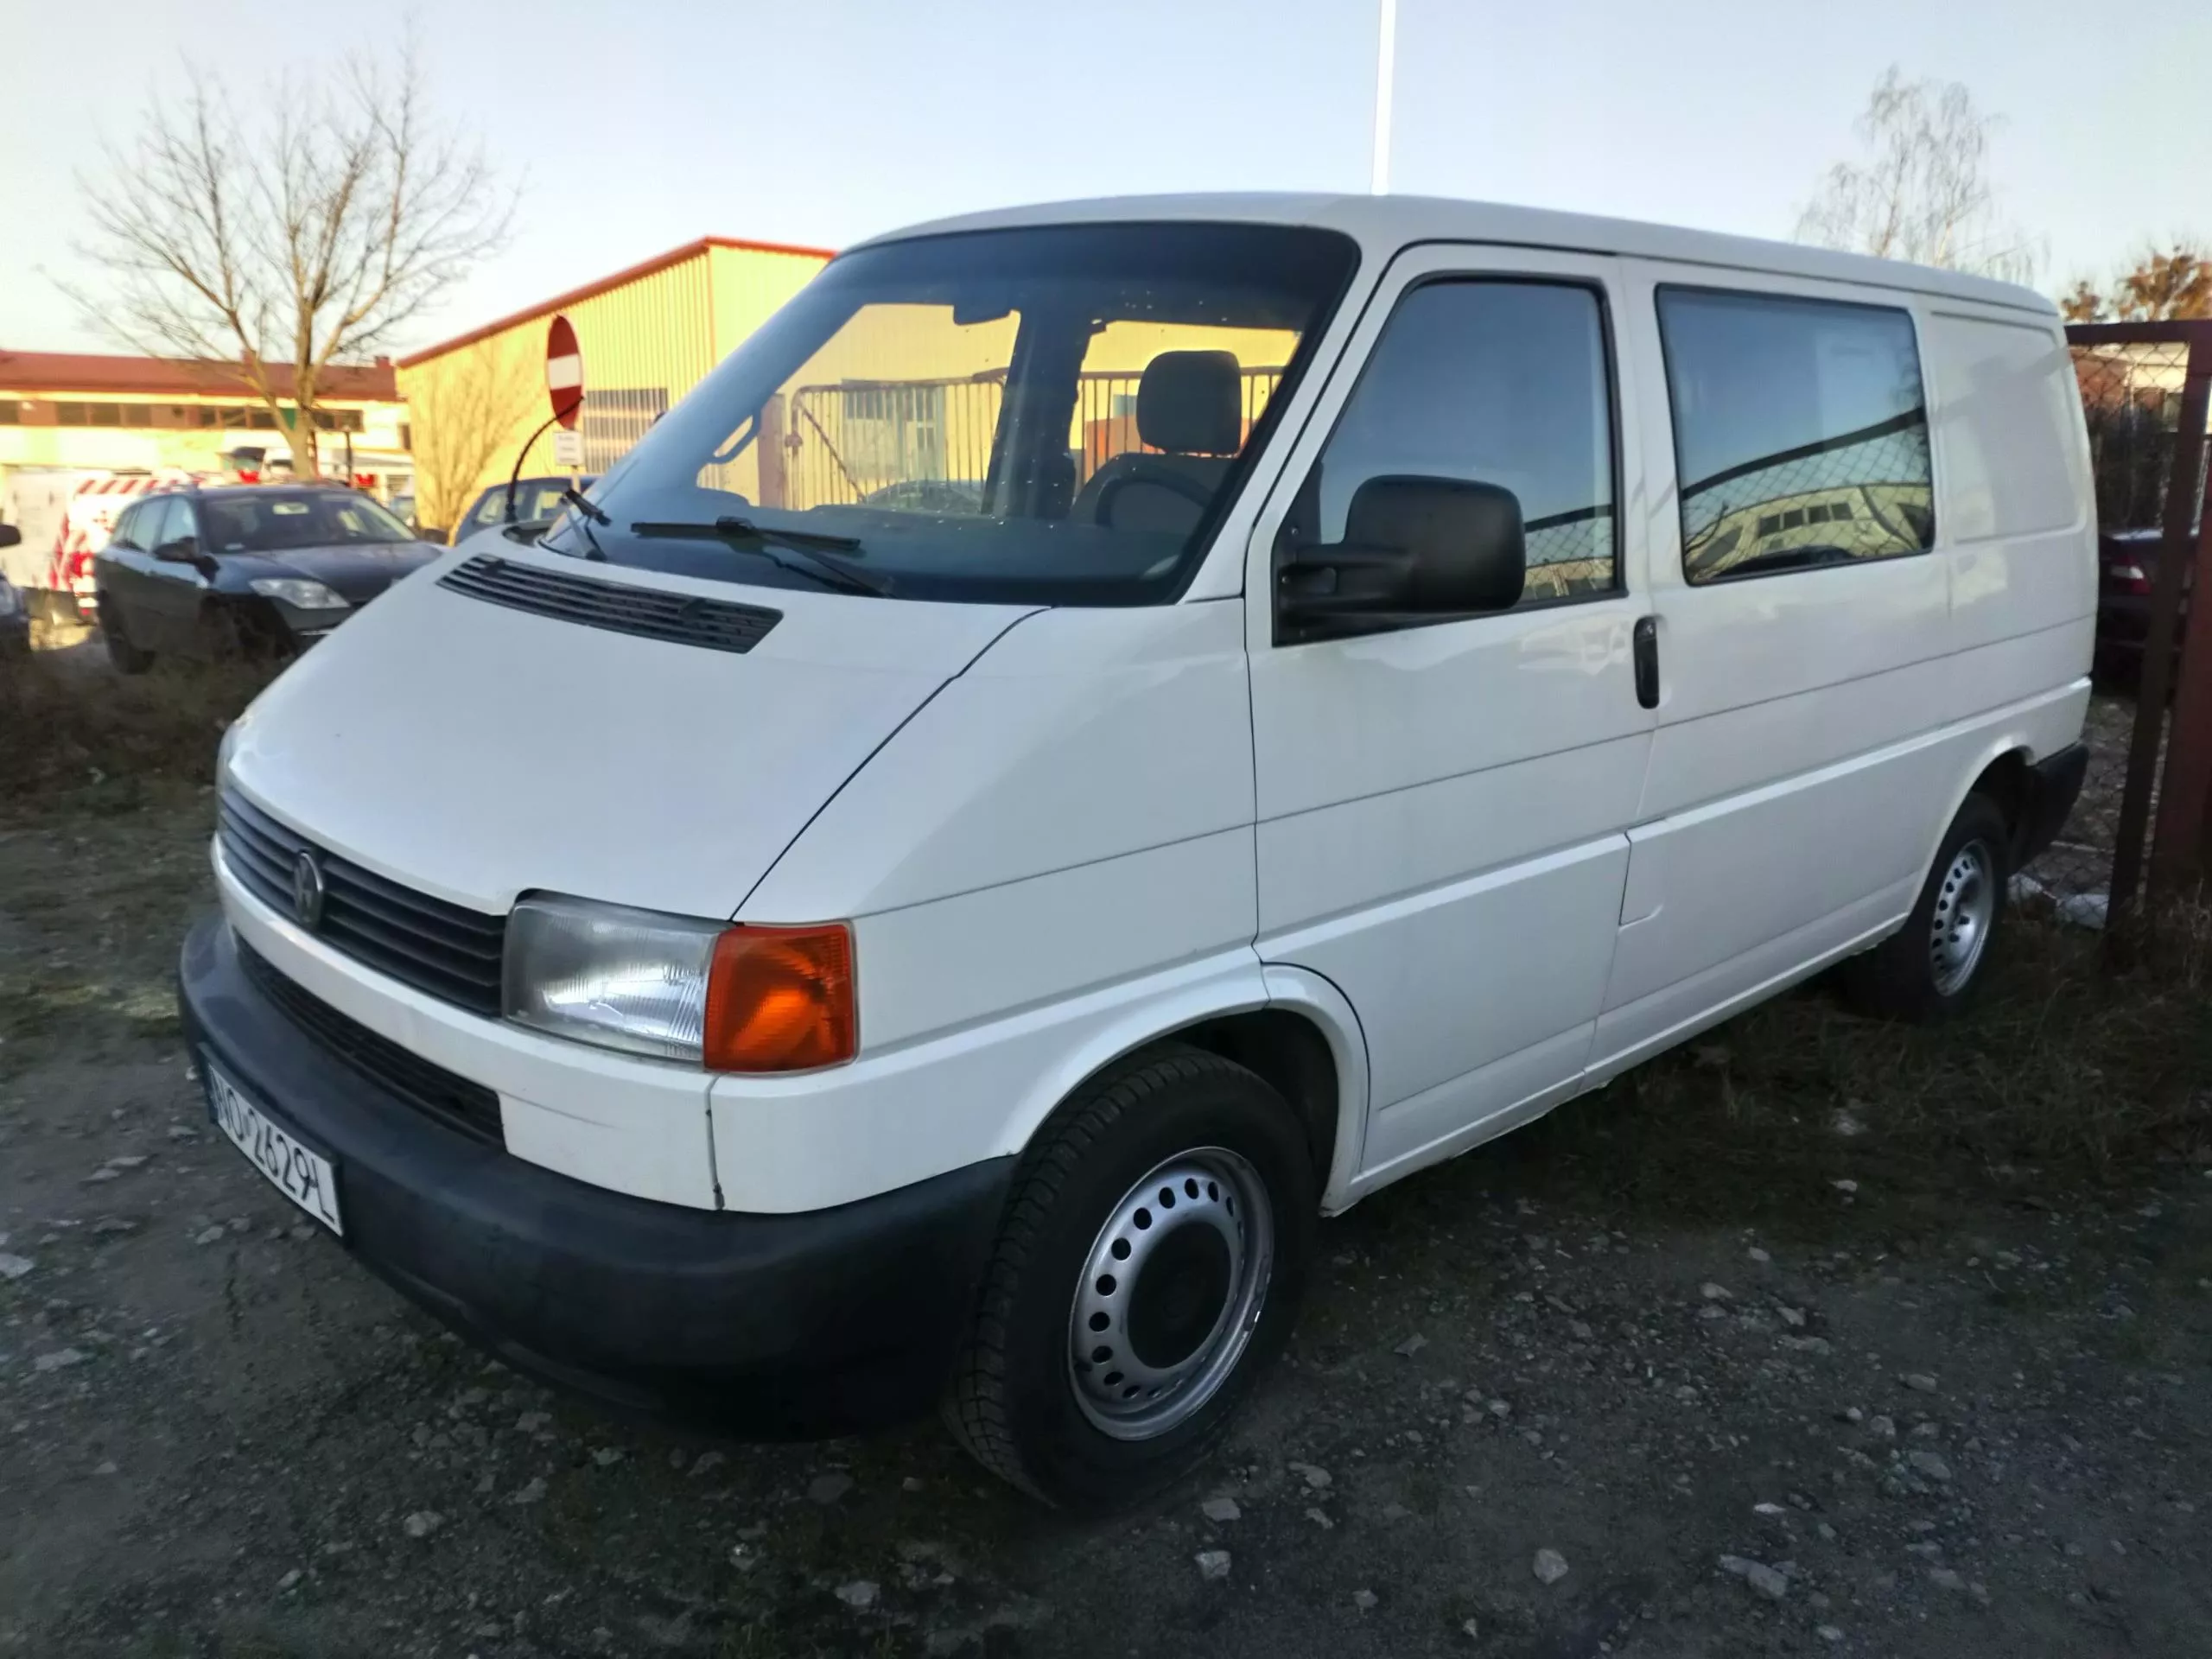

In [3]:
Image(filename='car.jpg',width = 600, height = 300)

## Definicje niezbędnych stałych

In [4]:
TANK_CAPACITY = 80
FUEL_CONSUM = 7.3

# Tyle możemy maksymalnie zjechać z trasy do stacji.
MAX_EXTRA_ROUTE = 50
# Przyjmujemy trasę o długości 5000 km.
END_POINT = 5000 
# Przyjmujemy że na początku trasy w baku mamy 30 litrów paliwa.
FUEL_START = 30

## Sąsiedztwo 
Sąsiedztwo otoczenia zdefiniowaliśmy na dwa sposoby.
W głównej funkcji za pomocą parametru prawdopodobieństwa ustalamy z jakim prawdopodobieństwem
znajdujemy nowe rozwiązanie w danym sąsiedztwie.
- Sąsiedztwo 1: Zmieniamy ilość tankowanego paliwa na stacjach
- Sąsiedztwo 2: Zmieniamy stację 

Oba sąsiedztwa są 'zabezpieczone' tzn. stacja jest osiągalna z warunków problemu a ilości
zatankowanego paliwa wystarczą na dojechanie do kolejnej stacji.

Pierwszy przykład działania algorytmu dla losowo wygenerowanych stacji.

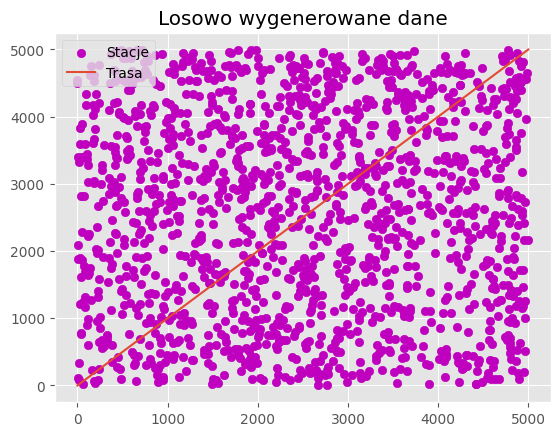

In [5]:
# 1500 losowo wygenerowanych stacji
stations, cords = utils.random_station_generator(1500, 
                            END_POINT,price_range=(3,6))

plot_random_stations(END_POINT, cords)

Wygenerowane powyżej stacje rozpatrujemy w algorytmie.

In [6]:
car = ds.Car(TANK_CAPACITY, FUEL_CONSUM, 0, FUEL_START)
init_s = init_solution(car, END_POINT, MAX_EXTRA_ROUTE, stations)

print("Stacje wybrane podczas inicjalizacji rozwiązania:")
for station in init_s.get_solution():
    print(station)
print("\nWartość funkcji celu w pierwszym rozwiązaniu:"
      ,round(init_s.solution_value(), 2), )

Stacje wybrane podczas inicjalizacji rozwiązania:
(Station: 1054 5.36$, 78.78)
(Station: 916 5.45$, 49.5)
(Station: 1415 4.97$, 45.59)
(Station: 1251 4.16$, 11.76)
(Station: 1353 5.63$, 62.67)
(Station: 565 3.53$, 58.41)
(Station: 1368 3.71$, 6.32)
(Station: 720 4.8$, 42.35)
(Station: 754 5.16$, 30.09)

Wartość funkcji celu w pierwszym rozwiązaniu: 2036.8


Wizualizacja wyniku otrzymanego jako rozwiązanie inicjujące:


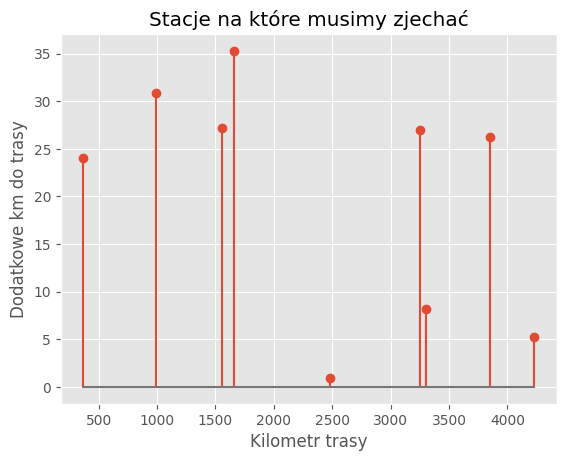

In [7]:
plot_solution(init_s)

Przechodzimy do wywołania głównej funkcji realizującej algorytm.
Nowe argumenty jakie wprowadzamy:
- Parametr T = 2000
- $\alpha$ = 0.95
- Maksymalna ilość iteracji = 10000
- Z prawdopodobieństwem 0.7 przyjmujemy sąsiedztwo (zmiana stacji)

In [8]:
# W zmiennej lst_of_scores przechowujemy historie funkcji celu
best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 2000, 0.95, 10000)

### Wizualizacja zmian funkcji celu w algorytmie

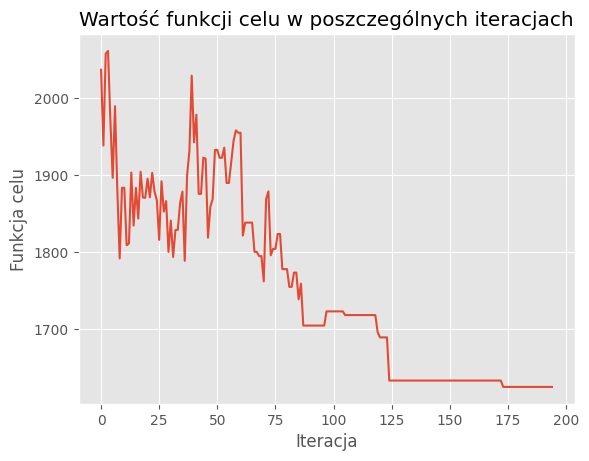

In [9]:
plot_score(lst_of_scores, iters)

## Analiza otrzymanego wyniku

In [10]:
print("\nNajlepsze otrzymane rozwiązanie:"
      ,round(best_solution.solution_value(), 2), )
print("Początkowe rozwiązanie:", round(init_s.solution_value(), 2), )
print("Liczba wykonanych iteracji:",iters )
print("Liczba zamian na gorsze rozwiązanie:",worse )


Najlepsze otrzymane rozwiązanie: 1624.84
Początkowe rozwiązanie: 2036.8
Liczba wykonanych iteracji: 194
Liczba zamian na gorsze rozwiązanie: 36


## O czym mówi najlepsze rozwiązanie?

In [11]:
print("Wartość funkcji celu:",round(best_solution.solution_value(), 2))
print("Koszt zatankowanego paliwa:",round(best_solution.get_cost_of_solution(), 2))
print("Wartość funkcji kary:", round(best_solution.get_penalty(), 2))
print("Bilans start/koniec paliwa", best_solution.fuel_difference)

Wartość funkcji celu: 1624.84
Koszt zatankowanego paliwa: 1440.11
Wartość funkcji kary: 97.7
Bilans start/koniec paliwa -22.46


Wizualizacja wyniku otrzymanego jako rozwiązanie najlepsze:

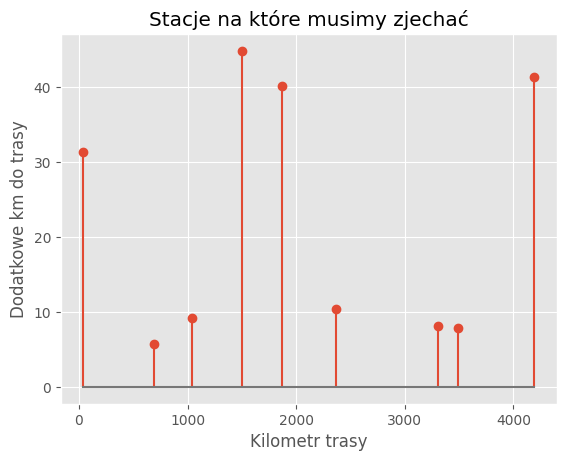

In [12]:
plot_solution(best_solution)

## Czy mogliśmy uzyskać lepsze rozwiązanie? Sprawdźmy otrzymane wyniki w zależności od przyjęcia różnych wartości parametru P


In [13]:
P_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
scores = []
for elem in P_values:
    best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,elem, 2000, 0.95, 10000)
    scores.append(round(best_solution.solution_value(), 2))

In [14]:
for p,s in zip(P_values, scores):
    print(f'Parametr P: {p:.1f} \nWartość funkcji celu: {s}\n')

Parametr P: 0.0 
Wartość funkcji celu: 1890.66

Parametr P: 0.1 
Wartość funkcji celu: 1670.36

Parametr P: 0.3 
Wartość funkcji celu: 1633.0

Parametr P: 0.5 
Wartość funkcji celu: 1622.71

Parametr P: 0.7 
Wartość funkcji celu: 1664.37

Parametr P: 0.9 
Wartość funkcji celu: 1581.83

Parametr P: 1.0 
Wartość funkcji celu: 1555.04



In [15]:
print(f'Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego {P_values[np.argmin(scores)]}. Nie ma jednak reguły.')

Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego 1. Nie ma jednak reguły.


### Jednak nie jest to jedyny parametr, który możemy zmieniać. Zwiększmy teraz parametry T oraz $\alpha$.
- T = 20000
- $\alpha$ = 0.99

In [16]:
best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 20000, 0.99, 10000)

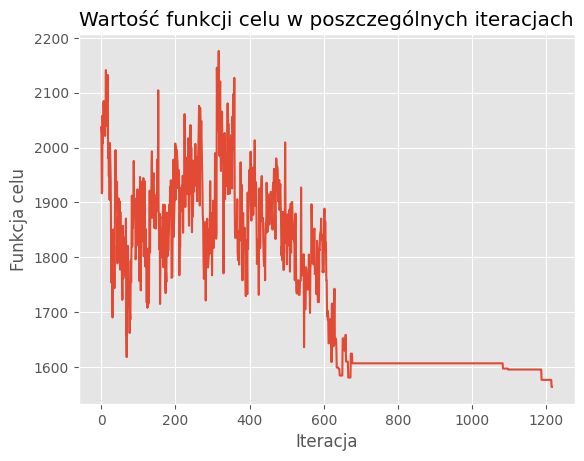

In [17]:
plot_score(lst_of_scores, iters)

In [18]:
print("\nNajlepsze otrzymane rozwiązanie:"
      ,round(best_solution.solution_value(), 2))
print("Początkowe rozwiązanie:", round(init_s.solution_value(), 2))
print("Liczba wykonanych iteracji:",iters )
print("Liczba zamian na gorsze rozwiązanie:",worse )


Najlepsze otrzymane rozwiązanie: 1563.3
Początkowe rozwiązanie: 2036.8
Liczba wykonanych iteracji: 1215
Liczba zamian na gorsze rozwiązanie: 297


Do czego doprowadziły zmiany? Zwiększyły one ilość wykonanych iteracji w naszym algorytmie oraz poprawiły wartość funkcji celu. Sam wykres wartości funkcji celu w zależności od iteracji wygląda poprawnie. Z początku gdy wartość parametru T jest największa, częściej przyjmujemy gorsze rozwiązanie. Gdy wraz z ilością iteracji wartość T spada, coraz rzadziej akcpetujemy gorsze rozwiązanie a wykres staje się mniej chaotyczny.

### Zbadajmy znów zachowanie algorytmu dla różnych wartości parametru P

In [19]:
P_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
scores = []
for elem in P_values:
    best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,elem, 20000, 0.99, 10000)
    scores.append(round(best_solution.solution_value(), 2))

In [20]:
for p,s in zip(P_values, scores):
    print(f'Parametr P: {p:.1f} \nWartość funkcji celu: {s}\n')

Parametr P: 0.0 
Wartość funkcji celu: 1875.19

Parametr P: 0.1 
Wartość funkcji celu: 1528.19

Parametr P: 0.3 
Wartość funkcji celu: 1542.5

Parametr P: 0.5 
Wartość funkcji celu: 1591.84

Parametr P: 0.7 
Wartość funkcji celu: 1491.09

Parametr P: 0.9 
Wartość funkcji celu: 1482.6

Parametr P: 1.0 
Wartość funkcji celu: 1508.3



In [21]:
print(f'Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego {P_values[np.argmin(scores)]}. Nie ma tutaj jednak reguły')

Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego 0.9. Nie ma tutaj jednak reguły


Po zwiększeniu parametru T oraz $\alpha$ otrzymaliśmy lepsze wyniki.
Można z tego wnioskować że im więcej iteracji, tym większa szansa
na znalezienie lepszego rozwiązania.

Dla tych wartości parametrów porównamy przebiegi funkcji celu.

In [22]:
_, scoresP01, iters1,__ = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE, P=0.1
                        ,T=2000, alfa=0.99)

_, scoresP03, iters2,__ = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE, P=0.3
                        ,T=2000, alfa=0.99)

_, scoresP06, iters3,__ = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE, P=0.6
                        ,T=2000, alfa=0.99)

_, scoresP09, iters4,__ = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE, P=0.9
                        ,T=2000, alfa=0.99)


In [23]:
def plot_proba():
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
    tit = f.suptitle("Wykres f. celu od iteracji", fontsize="x-large")
    ax1.plot(range(iters1 +1 ), scoresP01)
    ax1.set_title('P = 0.1')
    ax2.plot(range(iters2+1 ), scoresP03)
    ax2.set_title('P = 0.3')
    ax3.plot(range(iters3+1 ), scoresP06)
    ax3.set_title('P = 0.6')
    ax4.plot(range(iters4+1 ), scoresP09)
    ax4.set_title('P = 0.9')

    tit.set_y(0.95)
    f.subplots_adjust(top=0.85)
    f.tight_layout()

Przebiegi funkcji celu.

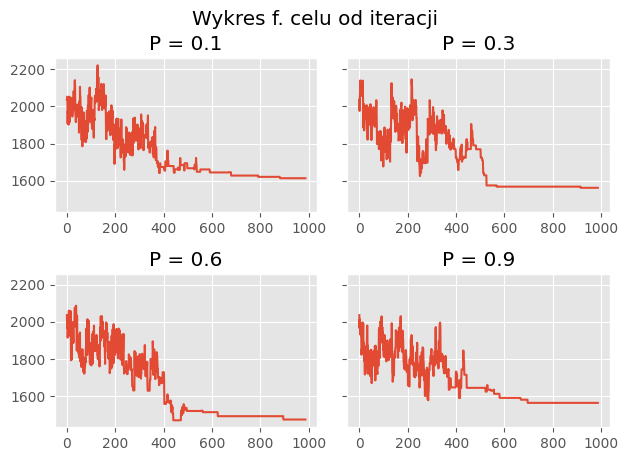

In [24]:
plot_proba()

## Jak zachowa się algorytm po rozpoczęciu działania od najlepszego rozwiązania?

Rozpoczynamy od znalezienia najlepszego rozwiązania po 1000 iteracjach.

In [28]:
best_solution, _, _,_ = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 20000, 0.99, 1000)
print(best_solution.solution_value())

1565.22


## Następnie wywołujemy algorytm rozpoczynając od tego rozwiązania:


In [29]:
new_best, _, _,_ = simulated_annealing(
                        new_solution,
                        best_solution, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 20000, 0.99, 1000)
print(new_best.solution_value())

1460.07


Jak widać w kolejnym wywołaniu udało nam się znaleźć lepsze rozwiązanie, jednak tutaj nie jest to gwarantowane. 
Mamy pewność że nie znajdziemy gorszego rozwiązania. Jednak jeśli pierwsze rozwiązanie było znalezione po dużej ilości iteracji ciężko nam będzie je już poprawić. Jest to kolejny przykład na to, że im więcej iteracji dopuścimy  tym większa szansa na znalezienie lepszego rozwiązania. 

## Przypadek złośliwy dla algorytmu

Przypadek jaki spowoduje niewykonanie procedury jest przypadek gdy mamy 'dziurę' w trasie.
Może dojść do sytuacji kiedy wprowadzimy zbyt mało stacji i dojechanie do kolejnej, 
nawet po zatankowaniu do pełna będzie niemożliwe. Program zwraca wtedy błąd
i informuje uzytkownia w którym momencie nie można znaleźć kolejnej stacji.

Co możemy wtedy zrobić?
- Zwiększyć MAX_EXTRA_ROUTE
- Wprowadzić więcej stacji branych pod uwagę

## Dziękujemy za uwagę